In [33]:
#!pip install faiss-cpu
!pip install cudf

  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'cudf' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'cudf'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [58 lines of output]
      /opt/miniconda3/envs/py39/lib/python3.9/site-packages/setuptools/dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:

In [31]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import os
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
sys.path.append(src_path)
#from OCD import *

from OCD_gpu import *

rng = np.random.seed(0)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 38.5 MB/s eta 0:00:00


ModuleNotFoundError: No module named 'cudf'

In [ ]:
Np = 10**4 # number of points/particles/samples
dim = 2

X = np.random.normal(0,1,(Np,dim))
Y = swissroll(Np)

## store samples for future use
Y00 = Y.copy()
X00 = X.copy()

fig, axes = plt.subplots(1, 2, figsize=(9, 3))

h1 = axes[0].hist2d(X[:,0],X[:,1],bins=80, range=[[-4,4],[-4,4]], density=True)
axes[0].set_title("Normal")
axes[0].set_xlabel(r"$x_1$")
axes[0].set_ylabel(r"$x_2$")
fig.colorbar(h1[-1], ax=axes[0])  # Add colorbar for the first plot

h2 = axes[1].hist2d(Y[:,0],Y[:,1],bins=80, range=[[-4,4],[-4,4]], density=True)
axes[1].set_title("Swiss-Roll")
axes[1].set_xlabel(r"$x_1$")
axes[1].set_ylabel(r"$x_2$")
fig.colorbar(h2[-1], ax=axes[1])  # Add colorbar for the first plot

covariance matrix of X is:
 [[2.99365984 0.97766706]
 [0.97766706 2.97231451]]


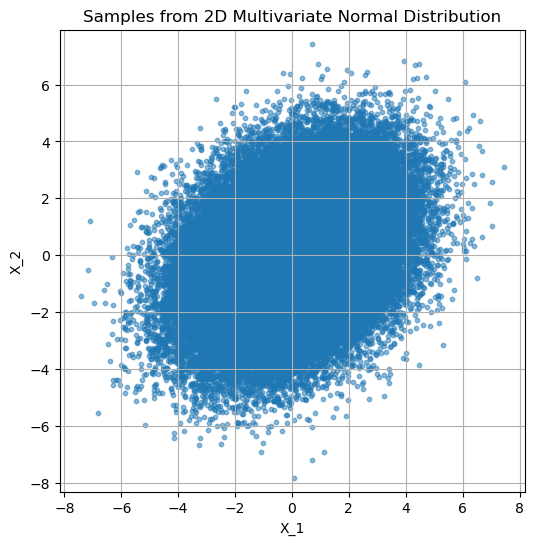

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Mean vector and covariance matrix
mean = [0, 0]
cov = [[3, 1], [1, 3]]  # covariance matrix

# Number of samples
n_samples = 100000

# Generate samples
X = np.random.multivariate_normal(mean, cov, n_samples)

print("covariance matrix of X is:\n", np.cov(X, rowvar=False))

# Plot the samples
plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], s=10, alpha=0.5)
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.title("Samples from 2D Multivariate Normal Distribution")
plt.axis("equal")
plt.grid(True)
plt.show()


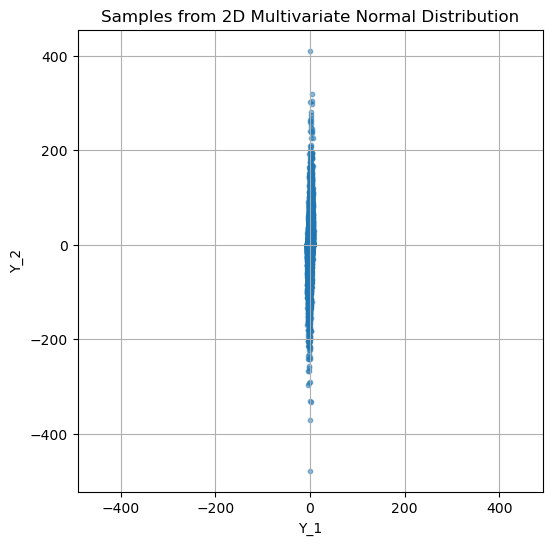

In [25]:
Y = X.copy()
np.random.shuffle(Y)
Y[:,1] = Y[:,1]**3

plt.figure(figsize=(6, 6))
plt.scatter(Y[:,0], Y[:,1], s=10, alpha=0.5)
plt.xlabel("Y_1")
plt.ylabel("Y_2")
plt.title("Samples from 2D Multivariate Normal Distribution")
plt.axis("equal")
plt.grid(True)
plt.show()

In [26]:
X0 = X.copy()
Y0 = Y.copy()

eps0 = find_opt_eps2(X0, Y0, log_eps_range=[-3,0], nepss = 400, perc=0.9998)
print("epsilon = ", eps0)

dt = 0.1
Nt = 200
tol = 1e-6

X_ocd, Y_ocd, dists, err_m2X, err_m2Y = ocd_map_RK4(X0, Y0, dt=dt, Nt=200, sigma=eps0, tol=tol)

epsilon =  0.024602398208697765


18.160046652715316


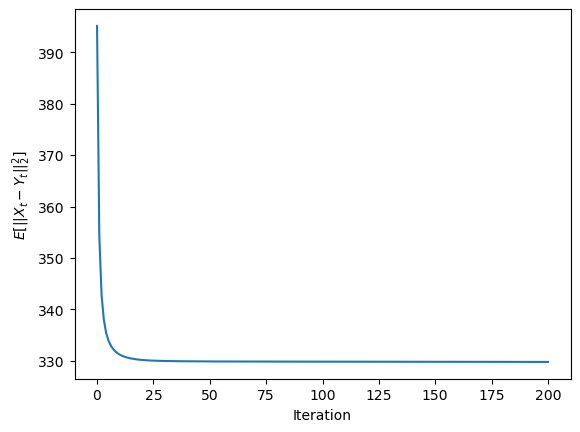

In [27]:
plt.figure()
plt.plot(dists)
plt.ylabel(r"$E[||X_t-Y_t||_2^2]$")
plt.xlabel("Iteration") 

print(np.sqrt(dists[-1]))

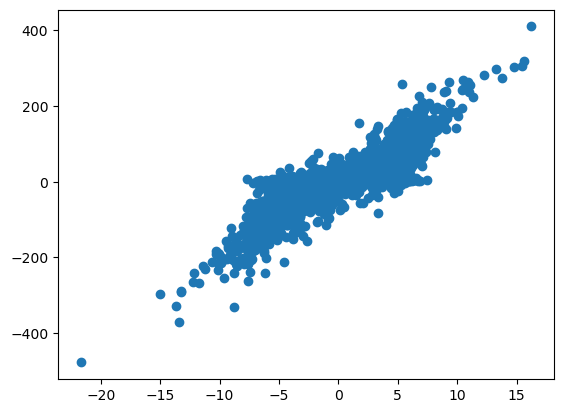

In [28]:
plt.scatter(X_ocd[:,1], Y_ocd[:,1])

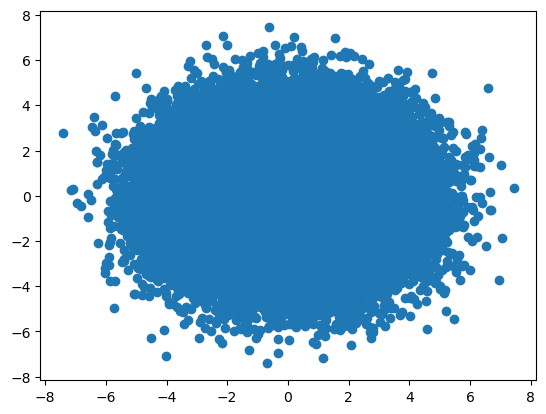

In [29]:
plt.scatter(X[:,0], Y[:,0])